In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("Job_Placement_Data.csv")

In [4]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [23]:
df.head(5)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [24]:
df.shape

(215, 13)

In [25]:
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [28]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [29]:
df.duplicated().sum()

0

In [30]:
columns = df.columns
numerical_columns = [column for column in columns if df[column].dtypes != 'O']
categorical_columns = [column for column in columns if df[column].dtypes == 'O']

print('We have {} numerical features : {}'.format(len(numerical_columns), numerical_columns))
print('\nWe have {} categorical features : {}'.format(len(categorical_columns), categorical_columns))

We have 5 numerical features : ['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'emp_test_percentage', 'mba_percent']

We have 8 categorical features : ['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree', 'work_experience', 'specialisation', 'status']


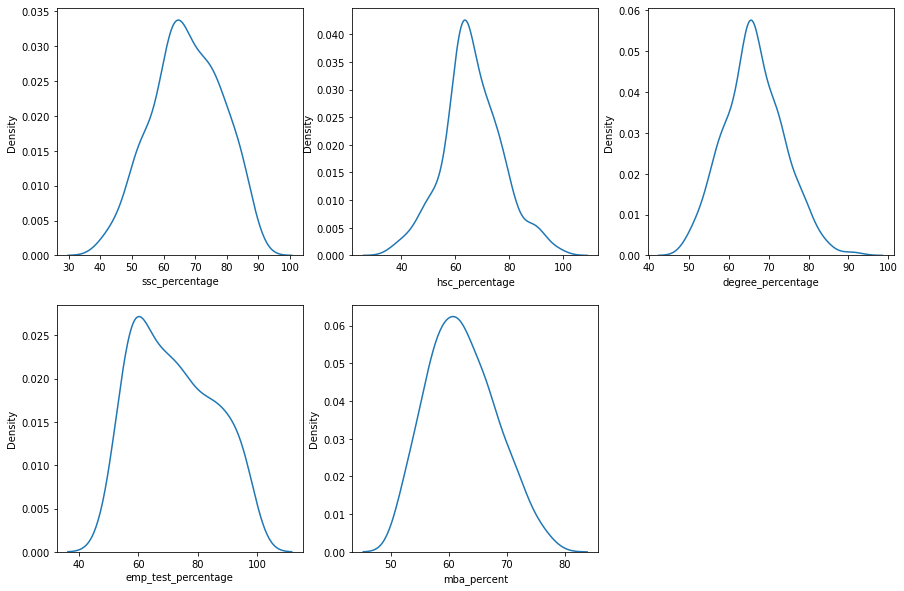

In [108]:
fig, axes = plt.subplots(2, 3 , figsize=(15, 10))

axes = axes.flatten()
for i in range(len(numerical_columns)):
    sns.kdeplot(data=df,x=df[numerical_columns[i]],ax=axes[i])
    
fig.delaxes(axes[-1])
plt.show()
    



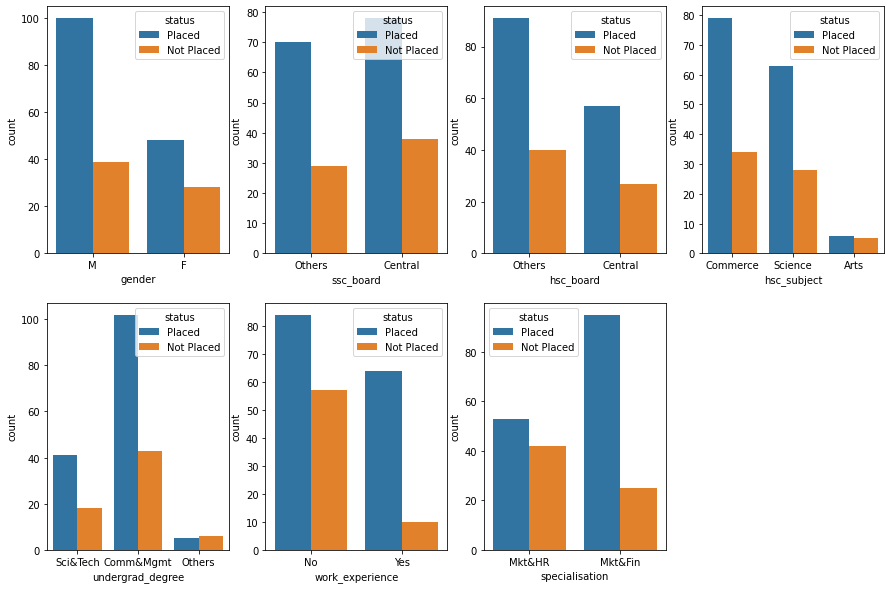

In [124]:
fig, axes = plt.subplots(2, 4 , figsize=(15,10))

axes = axes.flatten()
for i in range(len(categorical_columns)):
    if categorical_columns[i] != 'status':
        sns.countplot(data=df,x=df[categorical_columns[i]],hue='status',ax=axes[i])
    
fig.delaxes(axes[-1])
plt.show()
    


In [152]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

<Axes: xlabel='status', ylabel='count'>

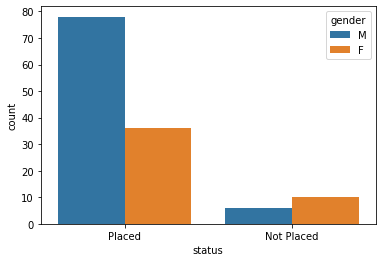

In [185]:
Placement_Details=df[(df['ssc_percentage'] > 60.0) & (df['hsc_percentage'] > 60.0) & (df['degree_percentage'] > 60.0)]

sns.countplot(Placement_Details['status'],hue='gender',data=Placement_Details)

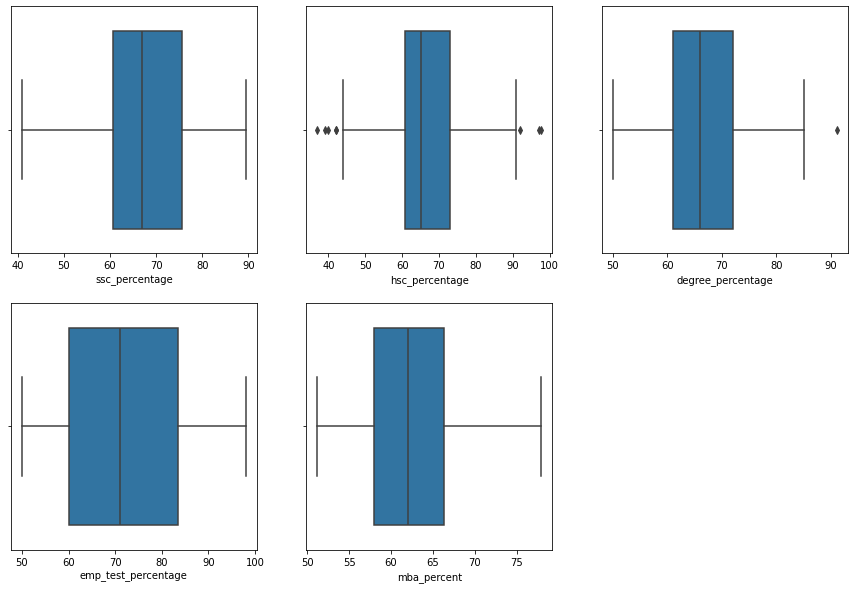

In [151]:
fig, axes = plt.subplots(2, 3 , figsize=(15, 10))

axes = axes.flatten()
for i in range(len(numerical_columns)):
    sns.boxplot(data=df,x=df[numerical_columns[i]],ax=axes[i])
    
fig.delaxes(axes[-1])
plt.show()

In [205]:
for i in numerical_columns:
    q1 = df[i].quantile(0.25)
    q3 =  df[i].quantile(0.75)
    IQR = q3 - q1
    lower_range = q1 - (1.5*IQR)
    higher_range = q3 + (1.5*IQR) 
    percentage = len(df[(df[i] < lower_range) | (df[i] >  higher_range)]) / len(df) * 100
    print(f"outliers present in {i} is {percentage}")
        
    

outliers present in ssc_percentage is 0.0
outliers present in hsc_percentage is 3.7209302325581395
outliers present in degree_percentage is 0.46511627906976744
outliers present in emp_test_percentage is 0.0
outliers present in mba_percent is 0.0


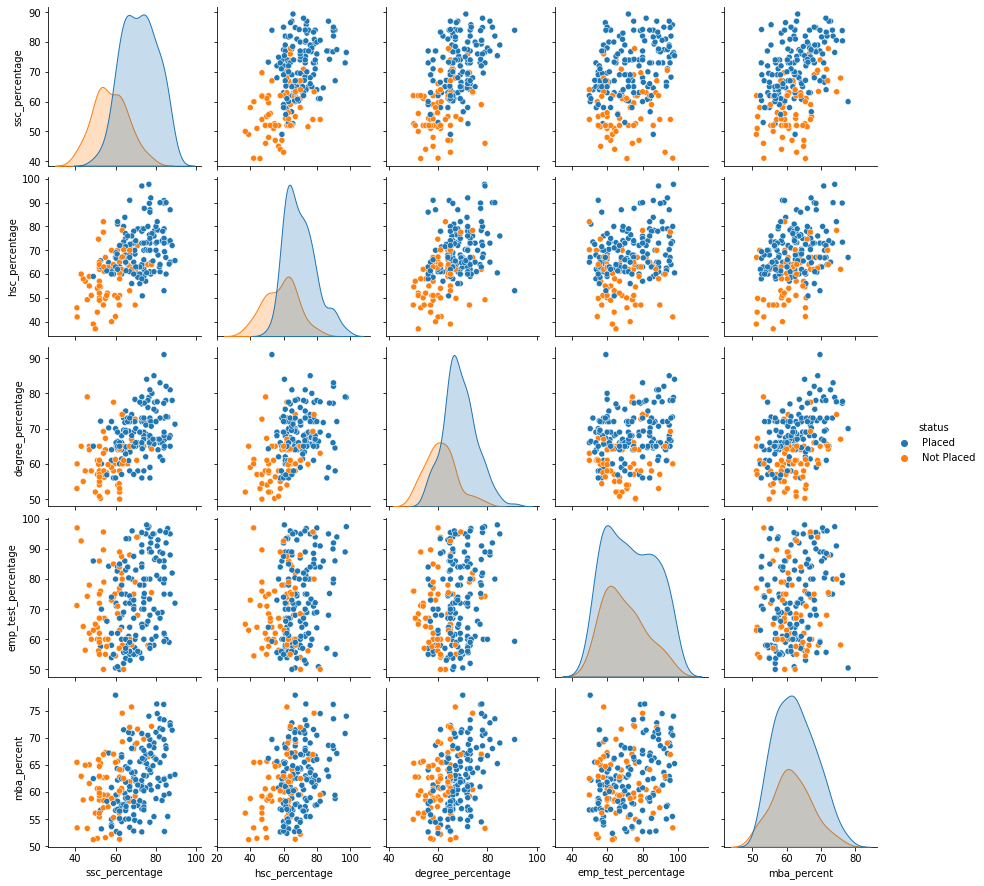

In [150]:
sns.pairplot(hue='status',data=df)

In [186]:
len(df)

215

In [200]:
len(df[(df['ssc_percentage'] < 40.0) | (df['ssc_percentage'] > 60.0)]) / len(df) * 100

75.81395348837209

In [202]:
outliers 

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
